In [ ]:
#This is for the Titanic competition


In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [98]:
train_data = pd.read_csv("data/train.csv")

In [99]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,age_bin,SibSp,Parch,Ticket,Fare,Cabin,cabin_code,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,less than 25,1,0,A/5 21171,7.2500,NaN,none,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,less thank 40,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,less than 30,0,0,STON/O2. 3101282,7.9250,NaN,none,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,less thank 40,1,0,113803,53.1000,C123,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,less thank 40,0,0,373450,8.0500,NaN,none,S


In [113]:
test_data = pd.read_csv("data/test.csv")

In [118]:
test_data.head()
print(len(test_data))

418


In [7]:
from sklearn.ensemble import RandomForestClassifier
y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X,y)
predictions = model.predict(X_test)

output=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was saved!")
#.77511

Your submission was saved!


In [9]:
model = LogisticRegression()
model.fit(X,y)
predictions=model.predict(X_test)
#.77033

In [10]:
output=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was saved!")


Your submission was saved!


In [34]:
features = ["Age", "Sex", "Pclass"]
avg_age = train_data["Age"].mean()
print(avg_age)

29.69911764705882


In [35]:
#Lets just look at age and gender.
X = pd.get_dummies(train_data[features])
X = X.fillna(avg_age)
print(X.head)
X_test = pd.get_dummies(test_data[features])
X_test = X_test.fillna(avg_age)

<bound method NDFrame.head of            Age  Pclass  Sex_female  Sex_male
0    22.000000       3           0         1
1    38.000000       1           1         0
2    26.000000       3           1         0
3    35.000000       1           1         0
4    35.000000       3           0         1
..         ...     ...         ...       ...
886  27.000000       2           0         1
887  19.000000       1           1         0
888  29.699118       3           1         0
889  26.000000       1           0         1
890  32.000000       3           0         1

[891 rows x 4 columns]>


In [36]:
model = LogisticRegression()
model.fit(X,y)
predictions=model.predict(X_test)

In [37]:
output=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was saved!")

Your submission was saved!


In [39]:
from sklearn.ensemble import RandomForestClassifier
y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch", "Age"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

avg_age = train_data["Age"].mean()
X = X.fillna(avg_age)
X_test = X_test.fillna(avg_age)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X,y)
predictions = model.predict(X_test)

output=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was saved!")
#.77511

model = LogisticRegression()
model.fit(X,y)
predictions=model.predict(X_test)
#.77033

Your submission was saved!


In [40]:
output=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was saved!")

Your submission was saved!


In [41]:
#Now we are going to feature engineer the data a bit.


TypeError: insert() missing 2 required positional arguments: 'column' and 'value'

In [47]:
train_data["age_bin"] = ""

In [48]:
train_data.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [95]:
train_data['Age'] = np.where((train_data.Age == 'nan'), 'unknown', train_data.Age)
train_data['Age'] = np.where((float(train_data.Age) < 5 ), 'Less than 5', train_data.Age)


TypeError: cannot convert the series to <class 'float'>

In [94]:
train_data.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex      Age  \
0                              Braund, Mr. Owen Harris    male     23.0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female     38.0   
2                               Heikkinen, Miss. Laina  female     26.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female     35.0   
4                             Allen, Mr. William Henry    male     35.0   
..                                                 ...     ... 

In [101]:
from sklearn.ensemble import RandomForestClassifier
y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch", "Age"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

avg_age = train_data["Age"].mean()
X = X.fillna(avg_age)
X_test = X_test.fillna(avg_age)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X,y)
predictions = model.predict(X_test)

output=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was saved!")
#.77511

model = LogisticRegression()
model.fit(X,y)
predictions=model.predict(X_test)
#.77033

Your submission was saved!


In [126]:
from sklearn import tree
y = train_data["Survived"]
features = ["Pclass", "Sex", "age_bin", "SibSp", "Parch", "Fare", "cabin_code", "Embarked"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
model = tree.DecisionTreeClassifier()
model.fit(X,y)
predictions=model.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [156]:
from sklearn import tree
y = train_data["Survived"]
features = ["Pclass", "Sex", "age_bin", "SibSp", "Parch", "Fare", "cabin_code", "Embarked"]

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

X, X_test = X.align(X_test, join='left', axis=1)

X_test['Fare'] = X_test['Fare'].fillna(value=10)
X_test['age_bin_less than 75'] = X_test['age_bin_less than 75'].fillna(value=0)
X_test['age_bin_less than 85'] = X_test['age_bin_less than 85'].fillna(value=0)
X_test['cabin_code_T'] = X_test['cabin_code_T'].fillna(value=0)

#display(X_test.isnull().any())

model = tree.DecisionTreeClassifier()
model.fit(X,y)
predictions=model.predict(X_test)

output=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was saved!")

Your submission was saved!


[Text(145.6774694973287, 212.26285714285714, 'X[5] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(56.07445725915875, 201.90857142857143, 'X[0] <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(25.4393487109905, 191.5542857142857, 'X[9] <= 0.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(16.353867028493895, 181.2, 'X[3] <= 13.25\ngini = 0.075\nsamples = 153\nvalue = [6, 147]'),
 Text(9.085481682496608, 170.84571428571428, 'X[15] <= 0.5\ngini = 0.245\nsamples = 21\nvalue = [3, 18]'),
 Text(7.268385345997286, 160.49142857142857, 'X[21] <= 0.5\ngini = 0.18\nsamples = 20\nvalue = [2, 18]'),
 Text(3.634192672998643, 150.13714285714286, 'X[8] <= 0.5\ngini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(1.8170963364993216, 139.78285714285715, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(5.451289009497964, 139.78285714285715, 'X[31] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(3.634192672998643, 129.42857142857144, 'gini = 0.0\nsampl

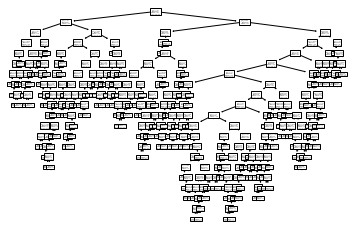

In [109]:
tree.plot_tree(model.fit(X,y))

In [157]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# class labels
labels = train_data.feature_names

# print dataset description
print(train_data.DESCR)

graph = Source(tree.export_graphviz(model, out_file=None
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

ModuleNotFoundError: No module named 'graphviz'